## CNN on MNIST datasset

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Visualize the first 6 images:

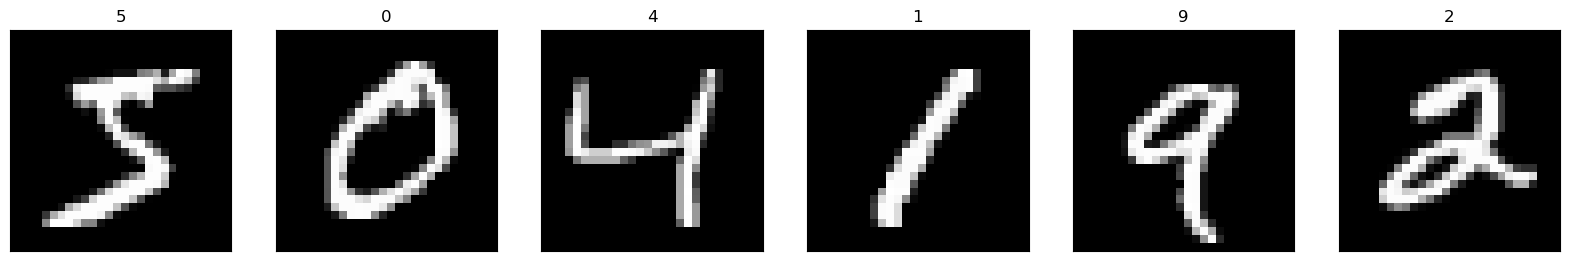

In [4]:
fig = plt.figure(figsize=(20, 20))

for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks = [], yticks = [])
    ax.imshow(X_train[i], cmap = 'gray')
    ax.set_title(str(y_train[i]))

### Pre-processsing the input training image:

In [5]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

### Label encoding the target values

In [6]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [7]:
from keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[:10])
print(y_test[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Reshaping the image before proceeding to neural networks.

In [13]:
img_rows, img_cols, color_channel= 28, 28, 1

X_train = X_train.reshape(X_train.shape[0], 
                          img_rows, 
                          img_cols, 
                          color_channel)
X_test = X_test.reshape(X_test.shape[0], 
                        img_rows, 
                        img_cols, 
                        color_channel)
input_shape = (img_rows, img_cols, 1)

print("Input image shape: ", input_shape)
print("X_train shape: ", X_train.shape)

Input image shape:  (28, 28, 1)
X_train shape:  (60000, 28, 28, 1)


## Creating Convolution neural network model:

- Importing required libraries

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Flatten, 
                                     Dense, 
                                     Dropout, 
                                     GlobalAveragePooling2D)
from tensorflow.keras.callbacks import ModelCheckpoint

- Creating the the structure of CNN

In [26]:
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(filters =  32, 
                 kernel_size =(3, 3), 
                 padding='same',
                 activation='relu',
                 input_shape=(28,28,1)))
# POOL_1: downsample the image to choose the best features
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, 
                 kernel_size = (3, 3),
                 padding='same', 
                 activation='relu'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(32, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                100384    
                                                                 
 dense_5 (

- Compiling the created CNN

In [27]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

The `ModelCheckpoint` module in `tensorflow.keras` can be used to save the model or its weights at regular intervals during training. This can be useful for resuming training if the training is interrupted, or for comparing the performance of different models.

To use the `ModelCheckpoint` module, you need to create an instance of the `ModelCheckpoint` class and pass it to the `fit()` method of the model. The ModelCheckpoint class has the following parameters:
- filepath: The path to the file where the model or weights will be saved.
- monitor: The metric to be monitored. The model or weights will be saved when the monitored metric improves.
- save_best_only: Whether to only save the best model or weights.
- save_weights_only: Whether to only save the weights.
- verbose: The verbosity level.

In [28]:
checkpointer = ModelCheckpoint(filepath='Chapter6.model.weights.best.hdf5', 
                               verbose=1,
                               save_best_only=True)

hist = model.fit(X_train, y_train, 
                 batch_size=64, epochs=10,
                 validation_data=(X_test, y_test), 
                 callbacks=[checkpointer],
                 verbose=2, 
                 shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.05940, saving model to model.weights.best.hdf5
938/938 - 23s - loss: 0.1785 - accuracy: 0.9456 - val_loss: 0.0594 - val_accuracy: 0.9813 - 23s/epoch - 25ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.05940 to 0.03467, saving model to model.weights.best.hdf5
938/938 - 23s - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0347 - val_accuracy: 0.9886 - 23s/epoch - 24ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 0.03467
938/938 - 22s - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0702 - val_accuracy: 0.9757 - 22s/epoch - 23ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.03467
938/938 - 22s - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0470 - val_accuracy: 0.9849 - 22s/epoch - 23ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.03467
938/938 - 22s - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.0381 - val_accuracy: 0.9877 - 22s/epoch - 23ms/step
Epoch 6/10

Epoch 6: val_loss improved from 0.034

- Load the Model with the Best Classification Accuracy on the Validation Set

In [29]:
model.load_weights('model.weights.best.hdf5')

- Calculate the Classification Accuracy on the Test Set

In [30]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.1900%
